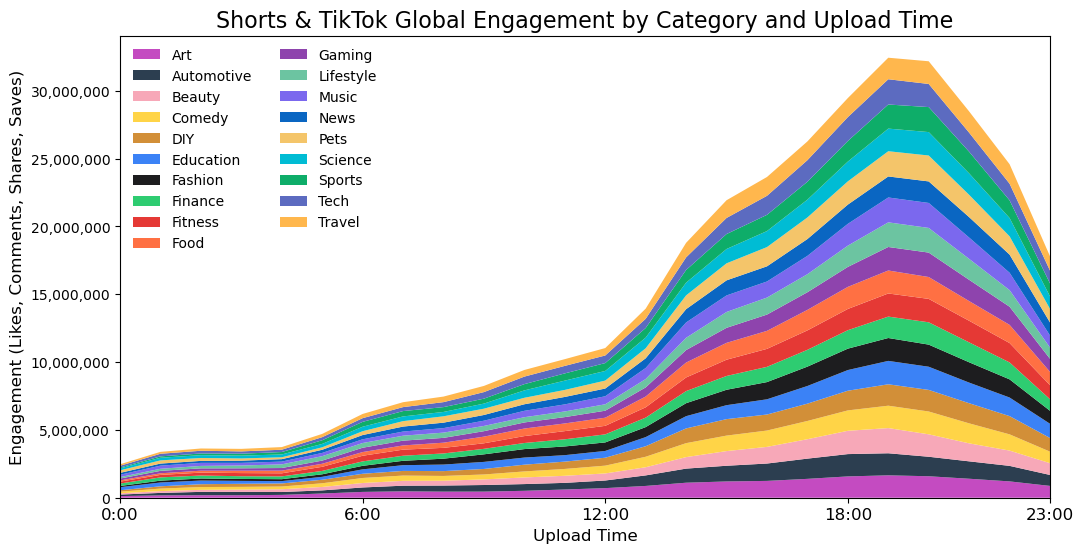

In [85]:
%matplotlib inline
import csv
import numpy as np
from collections import defaultdict
from scipy.signal import fftconvolve
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

def gaussian_kernel(sd, radius=3):
    # Create kernel from -radius*sd to +radius*sd
    size = int(radius * sd)
    x = np.arange(-size, size+1)
    kernel = np.exp(-0.5 * (x / sd)**2)
    kernel /= kernel.sum()  # ensures magnitude is preserved
    return kernel

def gaussian_smooth(y, sd=1):
    kernel = gaussian_kernel(sd)
    # full convolution then trim back to 24 points
    smoothed = fftconvolve(y, kernel, mode='same')
    return smoothed

M=defaultdict(lambda:defaultdict(lambda:0))
n=0
with open('/Users/sdank/Downloads/youtube_shorts_tiktok_trends_2025.csv', 'r', encoding='utf-8', newline='') as f:
    reader = csv.DictReader(f)
    
    for row in reader:
        category = row['category']
        engagement = float(row['engagement_total'])
        hour = int(row['upload_hour'])
        M[category][hour] += engagement

categories = sorted(M.keys())
hours = list(range(0, 24))

data = np.array([
    [M[cat][h] for h in hours]
    for cat in categories
])

COLORS = ["#C44BC1", "#2C3E50", "#F7A8B8", "#FFD447", "#D28F38", "#3B82F6", "#1D1D1F", "#2ECC71", "#E53935", "#FF7043", 
          "#8E44AD", "#6CC4A1", "#7B68EE", "#0A66C2", "#F4C56A", "#00BCD4", "#0EAD69", "#5C6BC0", "#FFB74D"]

fig, ax = plt.subplots(figsize=(12, 6))
grid = np.linspace(min(hours), max(hours), num=24)
data_smoothed = [gaussian_smooth(y_, sd=1) for y_ in data]
ax.stackplot(hours, *data_smoothed, labels=categories, colors=COLORS[:len(categories)])

ax.set_xlabel("Upload Time", fontsize=12)
ax.set_ylabel("Engagement (Likes, Comments, Shares, Saves)", fontsize=12)
ax.set_title("Shorts & TikTok Global Engagement by Category and Upload Time", fontsize=16)
ax.legend(loc="upper left", ncol=2, frameon=False)
ax.set_xlim(grid.min(), grid.max())
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

tick_positions = [0, 6, 12, 18, 23]
tick_labels = ["0:00", "6:00", "12:00", "18:00", "23:00"]
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, fontsize=12)

plt.show()